In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from tqdm import tqdm

In [3]:
from IPython.display import IFrame, display
file = 'Lectures/MonteCarlo.pdf'
IFrame(file, width=550, height=400)

Queremos calcular el segundo momento de la distribución usando el método de Montecarlo.
$$ x \sim exp(4) $$ 
$$ f(x) = \frac{1}{4}e^{\frac{-x}{4}} $$  
$$ E(x^{2}) = \int_{0}^{\infty}\frac{1}{4} x^{2} e^{\frac{-x}{4}} = 32$$
Hacer cambio de variable $y = \frac{1}{1+x}$

In [5]:
def FunctionExp(y):
    
    if(y.any() != 0):
        return ( (1/y - 1)**2 * np.exp( -(1/y - 1)/4 ) ) / (4*y**2)
    else:
        return 0.

def IntegralExacta():
    return 32.

In [6]:
def MCIntegral(N = 100):
    x = np.random.rand(N)
    return np.sum(FunctionExp(x))/N

In [10]:
n_intentos = 8
puntos = np.int_(np.logspace(2,6,n_intentos))
diferencias = np.ones(n_intentos)

for i in range(n_intentos):
    a = IntegralExacta()
    b = MCIntegral(N = puntos[i])
    diferencias[i] = np.abs( (a-b)/a )

print(diferencias)

[0.12702212 0.31107512 0.03603595 0.01651535 0.0205389  0.02150515
 0.00471912 0.00228469]


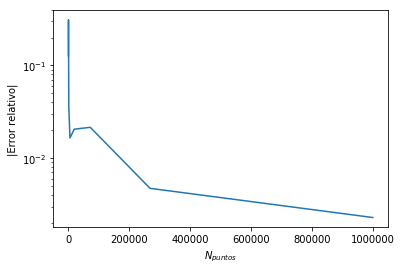

In [11]:
plt.plot(puntos, diferencias)
#plt.loglog()
plt.yscale('log')
plt.xlabel("$N_{puntos}$")
plt.ylabel("|Error relativo|")
plt.show()

En general es posible utilizar los puntos muestrales que siguen una dsitribución $g(x)$ para integrar una función $f(x)$. La siguiente aproximación de satisface:

$$ \frac{\int g(x)f(x)dx}{\int g(x)dx} = < f(x) > \approx \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$,

donde $g(x)$ es la función de densidad de probabilidad, que podría no estar normalizada. Por ejemplo, $\int_{0}^{\infty} e^{-x} sin(x) dx$ puede ser estimada usando la densidad de probabilidad de la exponencial y promediando el valor de $sin(x)$ en esos puntos.

In [26]:
def f(x):
    return np.sin(x)

def IntegralExacta():
    return 0.5

def MCIntegral(N = 100):
    #x = np.random.rand( N )
    x = np.random.exponential( size = N )
    return np.sum(f(x))/N

In [27]:
print(MCIntegral( 10000 ))

0.5020351398371031


In [28]:
n_intentos = 8
puntos = np.int_(np.logspace(2,6,n_intentos))
diferencias = np.ones(n_intentos)

for i in range(n_intentos):
    a = IntegralExacta()
    b = MCIntegral(N = puntos[i])
    diferencias[i] = np.abs( (a-b)/a )  

print(diferencias)

[0.10487166 0.05268181 0.02299241 0.00164172 0.00419884 0.00437853
 0.00119864 0.001099  ]


Text(0,0.5,'|Error|')

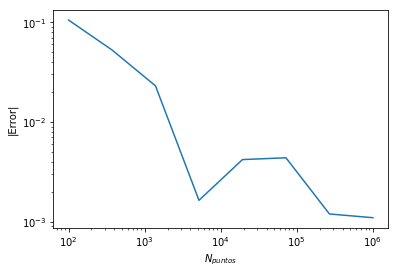

In [29]:
plt.plot(puntos, diferencias)
plt.loglog()
plt.xlabel("$N_{puntos}$")
plt.ylabel("|Error|")

Calcular la integral $\int_{0}^{\frac{\pi}{2}} xsin(x) dx$, notar los límites de integración!

In [59]:
def f(y):
    #return  (0.5*np.pi)**2 * y * np.sin( 0.5*np.pi*y )
    return  y*np.sin(y) 

def IntegralExacta():
    return 1.0

def MCIntegral(N = 100):
    x = np.random.rand( N )*0.5*np.pi
   # x = np.random.uniform(0., 0.5*np.pi)
    return (0.5*np.pi)*np.sum(f(x))/N

print(MCIntegral(1000000))

1.0007983541515104


In [63]:
Npoints = 1000
x = np.linspace(0.,np.pi)
def f(x):
    y = 0.5 * np.sin(x)
    if( np.isscalar(x) ): # verificar si es escalar
        if( x > np.pi or x < 0 ):
            y = 0
    else: # si es un array
        ii = (x.any() >np.pi) or (x.any() < 0)
        y[ii] = 0.
    return y

Text(0,0.5,'PDF(x)')

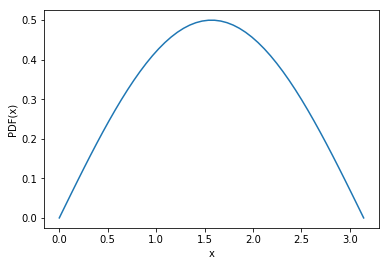

In [64]:
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('PDF(x)')

Generamos un punto $x_{i}$ de una distribución uniforme entre 0 y $\pi$, para cada $x_{i}$, generamos un $y_{i}$ de una distribución uniforme entre 0 y el máximo de $f(x)$, nos preguntamos si $y_{i} < f(x_{i})$; si es verdadero incluimos el valor $x_{i}$ en la lista.

In [68]:
Npoints = 1e6

Ninside = 0
trials = 0
lista = []

while Ninside < Npoints:
    xi = np.random.rand()*np.pi
    yi = np.random.rand()*0.5
    trials += 1
    if(yi < f(xi)):
        lista.append(xi)
        Ninside += 1

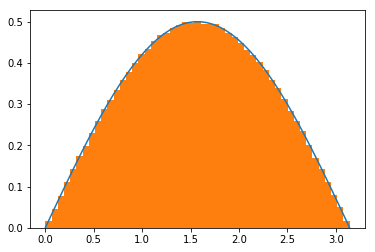

In [69]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

In [71]:
print(Ninside/float(trials))

0.63675083876


$$ g(x)= \int_{0}^{x} f(y) dy = -\frac{1}{2}cos(x) + \frac{1}{2} $$

In [72]:
def CumulFunction(x):
    return -0.5*np.cos(x) + 0.5

Text(0,0.5,'PDF(x) cumulativa')

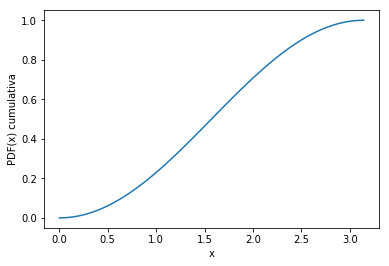

In [73]:
plt.plot(x, CumulFunction(x))
plt.xlabel('x')
plt.ylabel('PDF(x) cumulativa')

Si generamos puntos $z_{i}$ con una distribución uniforme entre 0 y 1, con $x_{i} = g^{-1}(z_{i})$. Los $x_{i}$ van a seguir la distribución $f(x)$ 

In [74]:
def InvCumulFunction(x):
    return np.arccos(-2.0*(x-0.5))

Text(0,0.5,'Inversa de la PDF(x) cumulativa')

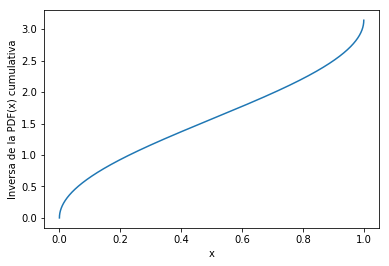

In [75]:
zi = np.linspace(0.,1.,int(Npoints))
plt.plot(zi, InvCumulFunction(zi))
plt.xlabel('x')
plt.ylabel('Inversa de la PDF(x) cumulativa')

In [77]:
# podemos evaluar la integral

z = np.random.rand(int(Npoints))
lista1 = InvCumulFunction(z)

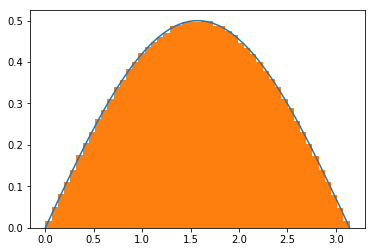

In [78]:
plt.plot(x,f(x))
_ = plt.hist(lista1, density=True, bins=x)

# Metropolis Hastings

Evita baja perder intentos y no necesita la integral analítica de la distribución. El algortimo se reduce a los siguientes pasos

1. Generar un número aleatorio $x_{i}$ que se encuentra en el rango de la PDF.
2. Proponer un segundo $x_{2}$ generados a través de un salto $\delta x$. Puede ser generado con una gaussiana centrado en 0 y con desviación $\sigma$.
3. Comparar la distribución en ambos puntos $r = f(x_{2})/f(x_{1})$.
4. Generar un tercer número $\alpha$ uniformemente distribuido entre 0 y 1.
5. Si $\alpha < r$ incluir el punto $x_{2}$ en la la lista, en caso contrario, incluir $x_{1}$ en la lista.
6. Ejecutar los pasos 1 a 4 hasta tener N puntos en la lista.

In [89]:
N = 100000
Ninside = 0
WidthSteps = 0.1
lista = [np.random.rand()*np.pi]
steps = [0]

for i in tqdm(range(1,N)):
    candidate = lista[i-1] + WidthSteps* (np.random.random()-0.5)
    r = min(1, f(candidate)/f(lista[i-1]))
    alpha = np.random.rand()
    
    if(alpha < r):
        lista.append(candidate)
        steps.append(i)
        Ninside += 1
    else:
        lista.append(lista[i-1])
        steps.append(i)
        Ninside +=1
        
lista = np.array(lista)

100%|██████████| 99999/99999 [00:01<00:00, 53419.58it/s]


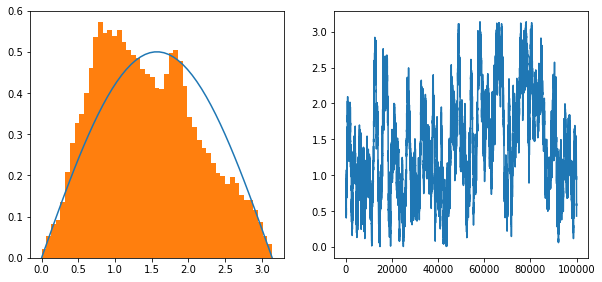

In [90]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.plot(x, f(x))
ax1.hist(lista, density=True, bins=x)
ax2.plot(steps, lista)